### 핵심 키워드
특성, 훈련, kNN, 모델, 정확도

data_set : https://www.kaggle.com/aungpyaeap/fish-market

In [3]:
# 예 : 도미의 길이와 무게
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

# 각 도미의 특징을 길이와 무게로 표현, 이런 특징을 특성(feature)라고 함
# 특성은 데이터의 특징

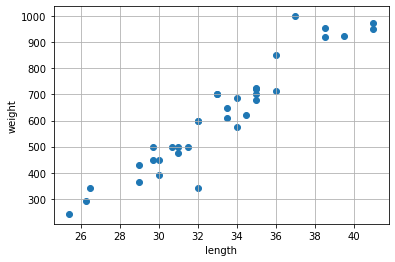

In [6]:
# 산점도 그래프
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(bream_length, bream_weight)
plt.xlabel('length') # x축 : 길이
plt.ylabel('weight') # y축 : 무게
plt.grid()
plt.show()
# 살짝 linear 하다

In [7]:
# 예 : 빙어의 길이와 무게
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

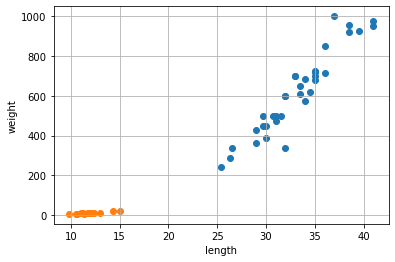

In [13]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length') # x축 : 길이
plt.ylabel('weight') # y축 : 무게
plt.grid()
plt.show()

## KNN : K-Nearest Neighbors
- k-최급접 이웃 알고리즘
- 각 데이터간 거리를 구해 k값만큼 근접 데이터셋을 찾고, 각 레이블값의 다수결(?)을 판단기준으로 함
- k는 다수결을 위해 홀수를 넣어야 한다.
- default k = 5

In [15]:
# 데이터 합치기
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [19]:
# 배열 만들기
# zip() 함수와 리스트 내포(list comprehension)
fish_data = [[l,w] for l, w in zip(length, weight)]
# print(fish_data)

In [20]:
# label 만들어 주기
# 도미 : 1, 빙어 : 0
fish_target = [1] * 35 + [0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 사이킷런 이용하기
- kNN : KNeighborsClassifier 클래스 이용
- 훈련 : fit() 메서드 이용
- 모델 평가 : score() 메서드 이용
- 예측 : predict() 메서드 이용

In [21]:
from sklearn.neighbors import KNeighborsClassifier

In [22]:
# KNeighborsClassifier 클래스의 객체 만들기
kn = KNeighborsClassifier()

In [23]:
# 훈련(training) : 사이킷런 ift() 메서드
kn.fit(fish_data, fish_target)

KNeighborsClassifier()

In [25]:
# 사이킷런 모델 평가 : score() 메서드 이용
# 0~1 사이값 반환, 1에 근접할 수록 정확도가 높음
kn.score(fish_data, fish_target)
# 반환값 : 정확도(accuracy)

1.0

In [26]:
# 모델 적용 해보기
# predict() 메서드 : 새로운 데이터의 정답 예측
kn.predict([[30, 600]])

array([1])

In [27]:
# KNeighborsClassifier에 전달한 데이터를 보관하고 있음
print(kn._fit_X)
print(kn._y)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


### 장점
- 간단하다.

### 단점
- 데이터셋의 수가 많을 수록 연산 느려짐 (직선 거리를 일일히 다 구하기 때문에)

# 키워드 정리
1. **특성**은 데이터를 표현하는 하나의 성질.
2. 머신러닝 알고리즘이 데이터에서 규칙을 찾는 과정을 **훈련**이라함. (사이킷런에선 fit)
3. kNN
4. 머신러닝 프로그램에서는 알고리즘이 구현된 객체를 **모델**이라 함.
5. **정확도**는 정확한 답을 몇 개 맞췄는지를 백분율로 나타낸 값 (0~1값)
    - 정확도 = (정확히 맞힌 개수) / (전체 데이터 개수)